### IMPORT DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Prepare Data

In [2]:
df = pd.read_csv(r"C:\Users\Dickson\Titanic\train.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
df = df.drop(columns=['Cabin'])

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Feature Engineering

In [12]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


<Axes: xlabel='Survived', ylabel='count'>

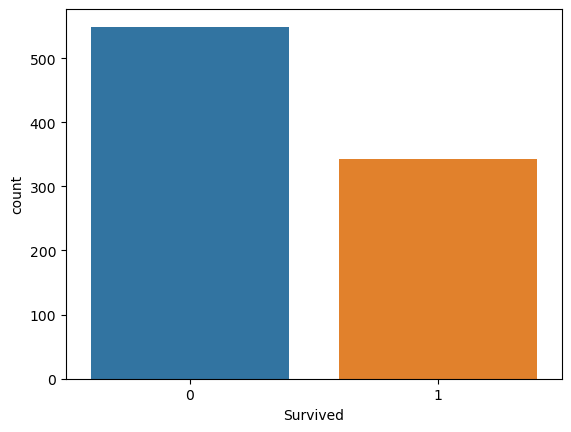

In [18]:
sns.countplot(x ='Survived', data=df)

<Axes: xlabel='Sex', ylabel='count'>

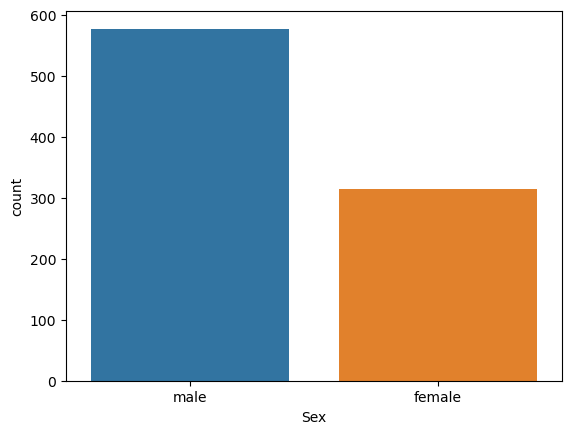

In [19]:
sns.countplot(x='Sex' , data=df)

<Axes: xlabel='Pclass', ylabel='count'>

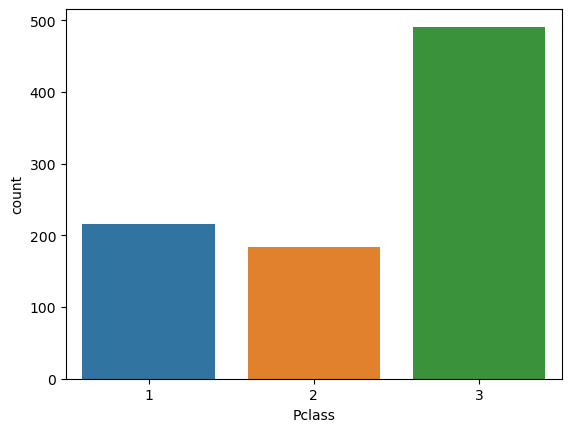

In [21]:
sns.countplot(x='Pclass' ,data=df)

<Axes: xlabel='Embarked', ylabel='count'>

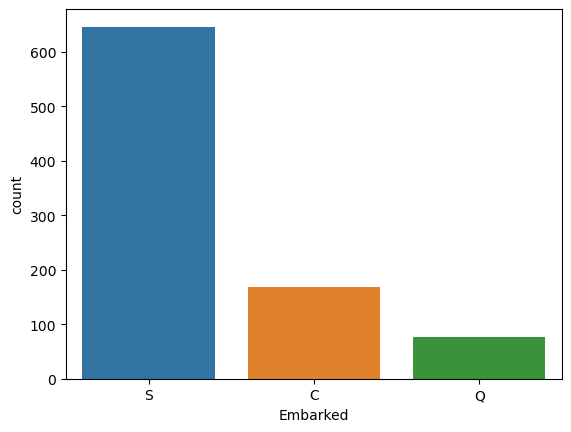

In [22]:
sns.countplot(x='Embarked', data=df)

### Encoding Categorical Values

In [24]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Title'], dtype='object')

In [28]:
df = df.drop(columns=['Ticket'])

In [30]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [31]:
df = pd.get_dummies(data = df, drop_first=True)

In [32]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,0,1,0,0,0,0


### Correlataion Analysis

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028,...,0.002245,0.044893,0.204265,0.002245,0.001122,0.580247,0.140292,0.001122,0.006734,0.001122
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751,...,0.047351,0.207186,0.403390,0.047351,0.033501,0.493796,0.347485,0.033501,0.081830,0.033501
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022204,...,0.008759,-0.026151,-0.073110,0.042506,-0.009904,0.038850,0.011245,-0.000261,0.012698,0.020070
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683,...,0.011329,0.085221,0.327093,0.060095,0.042470,-0.549199,0.339040,0.042470,-0.064988,0.042470
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053,...,-0.074282,0.082081,-0.000576,-0.074282,-0.052496,0.142698,-0.149209,-0.012381,-0.030413,-0.052496
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.031415,-0.006729,...,0.069761,-0.373960,-0.247483,-0.019543,-0.013812,0.180808,0.169578,-0.003507,0.087355,0.050589
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734,...,-0.022508,0.349559,0.087932,-0.022508,-0.015907,-0.250489,0.063407,-0.015907,-0.026622,0.014507
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814,...,-0.022467,0.267344,0.105567,-0.022467,-0.015878,-0.333905,0.225852,-0.015878,-0.021967,-0.015878
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184,...,-0.003514,0.010908,0.118271,0.025974,0.025037,-0.183766,0.105203,-0.012961,-0.023031,0.016687
Sex_male,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224,...,0.034990,0.159934,-0.686808,-0.064296,-0.045439,0.867334,-0.547600,-0.045439,0.060741,0.024728
Embarked_Q,-0.033606,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421,...,-0.014588,0.010478,0.171117,-0.014588,-0.010310,-0.078338,-0.089739,-0.010310,0.023515,-0.010310
Embarked_S,0.022204,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000,...,0.029210,0.024264,-0.130650,-0.077019,-0.054430,0.112870,0.002689,0.020643,0.019972,-0.054430


<Axes: title={'center': 'Correlated with Survived'}>

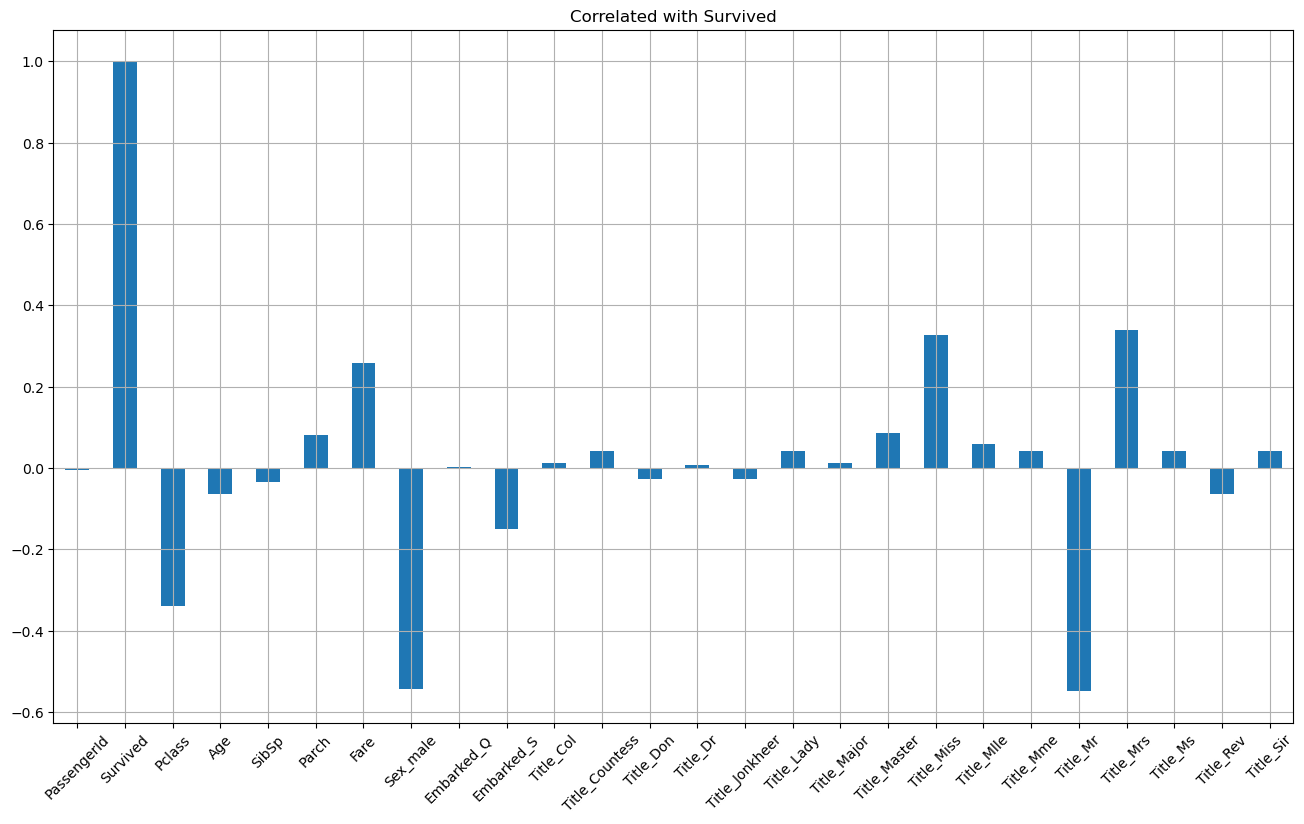

In [35]:
df.corrwith(df['Survived']).plot.bar(
    figsize=(16,9), title='Correlated with Survived', rot=45, grid=True
)  

In [38]:
df = df.drop(columns=['PassengerId'])

### SPLIT DATA INTO TRAIN AND TEST SET

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
features = df.drop(columns=['Survived'])
scaled_features = scaler.fit_transform(features)

In [46]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df['Survived'] = df['Survived'].values

In [47]:
scaled_df.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Survived
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838,-0.047431,-0.03352,...,-0.216803,-0.506655,-0.047431,-0.03352,0.850532,-0.403962,-0.03352,-0.082339,-0.03352,0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803,-0.047431,-0.03352,...,-0.216803,-0.506655,-0.047431,-0.03352,-1.175735,2.475480,-0.03352,-0.082339,-0.03352,1
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838,-0.047431,-0.03352,...,-0.216803,1.973729,-0.047431,-0.03352,-1.175735,-0.403962,-0.03352,-0.082339,-0.03352,1
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838,-0.047431,-0.03352,...,-0.216803,-0.506655,-0.047431,-0.03352,-1.175735,2.475480,-0.03352,-0.082339,-0.03352,1
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838,-0.047431,-0.03352,...,-0.216803,-0.506655,-0.047431,-0.03352,0.850532,-0.403962,-0.03352,-0.082339,-0.03352,0


## Model Building

### Logistics Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [72]:
logreg = LogisticRegression()

In [73]:
logreg.fit(X_train, y_train)

C:\Users\Dickson\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
y_pred = logreg.predict(X_test)

#### Model Evaluation

In [75]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [76]:
print(f"Accuracy: {accuracy:.2f}") 
print(f"Precision: {precision:.2f}") 
print(f"Recall: {recall:.2f}") 
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.80
Precision: 0.75
Recall: 0.74
F1 Score: 0.74


In [77]:
confusion_matrix(y_test, y_pred)

array([[93, 17],
       [18, 51]], dtype=int64)

### Support Vector Machine

In [78]:
from sklearn.svm import SVC


In [79]:
svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [81]:
y_pred = svm.predict(X_test)

#### Model Evaluation

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [83]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [84]:
print(f"Accuracy: {accuracy:.2f}") 
print(f"Precision: {precision:.2f}") 
print(f"Recall: {recall:.2f}") 
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.80
Precision: 0.74
Recall: 0.74
F1 Score: 0.74


In [85]:
confusion_matrix(y_test, y_pred)

array([[92, 18],
       [18, 51]], dtype=int64)

### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier 

In [87]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [89]:
y_pred = model.predict(X_test)

#### Model Evaluatiom

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [91]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [92]:
print(f"Accuracy: {accuracy:.2f}") 
print(f"Precision: {precision:.2f}") 
print(f"Recall: {recall:.2f}") 
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.84
Recall: 0.74
F1 Score: 0.78


In [93]:
confusion_matrix(y_test, y_pred)

array([[100,  10],
       [ 18,  51]], dtype=int64)

### XGBoost Classifier

In [95]:
from xgboost import XGBClassifier

In [97]:
xgbclass = XGBClassifier(random_state=0)
xgbclass.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [98]:
y_pred = xgbclass.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [100]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [101]:
print(f"Accuracy: {accuracy:.2f}") 
print(f"Precision: {precision:.2f}") 
print(f"Recall: {recall:.2f}") 
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.83
Recall: 0.72
F1 Score: 0.78


In [102]:
confusion_matrix(y_test, y_pred)

array([[100,  10],
       [ 19,  50]], dtype=int64)

### Hyperparameter Tuning

In [103]:
from sklearn.model_selection import RandomizedSearchCV


In [104]:
parameters = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.5, 0.7, 1.0]
}


In [106]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'n_estimators': [100, 200, 300, 400, 500],
 'subsample': [0.5, 0.7, 1.0]}

In [108]:
random_cv = RandomizedSearchCV(
    estimator=xgbclass,
    param_distributions=parameters,
    n_iter=5,  
    scoring='roc_auc', 
    cv=5,  
    verbose=3, 
    n_jobs=-1,  
)


In [110]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=3)

In [112]:
random_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [113]:
random_cv.best_params_

{'subsample': 1.0,
 'n_estimators': 400,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [115]:
random_cv.best_score_

0.8727967105749238

### Final Model (XGBoost Classifier)

In [116]:
from xgboost import XGBClassifier

In [121]:
final_model = XGBClassifier(
    subsample=1.0,
    n_estimators=400,
    min_child_weight=3,
    max_depth=5,
    learning_rate=0.3,
    gamma=0.2,
    colsample_bytree=0.7,
    random_state=42
)


In [122]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [124]:
y_pred = final_model.predict(X_test)


In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [126]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [127]:
print(f"Accuracy: {accuracy:.2f}") 
print(f"Precision: {precision:.2f}") 
print(f"Recall: {recall:.2f}") 
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.85
Recall: 0.72
F1 Score: 0.78


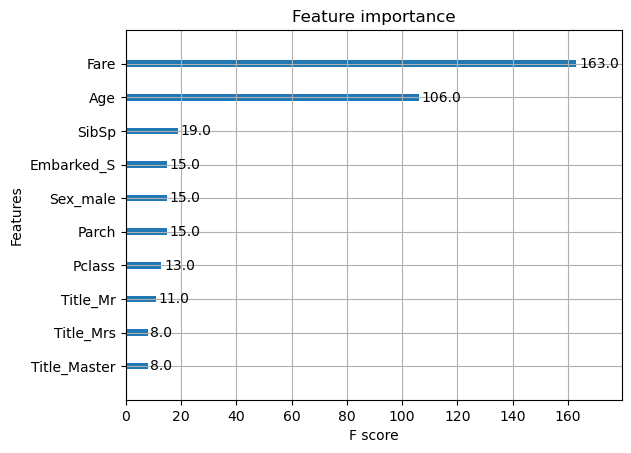

In [129]:
import xgboost as xgb
xgb.plot_importance(final_model, importance_type='weight', max_num_features=10)
plt.show()